### Run tensorflow structure

In [1]:
# https://hackmd.io/s/HJxsUvOpg
# initialize
import tensorflow as tf
import numpy as np

x = np.random.rand(100).astype(np.float32)
y = x*0.5 + 0.9

# build tensorflow structure
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))
Y = Weights*x + biases 

# mean square error
loss = tf.reduce_mean(tf.square(Y-y))

# Proporgation
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Training
init = tf.global_variables_initializer()

In [2]:
# method 1
sess = tf.Session()
sess.run(init)
for step in range(200):
    sess.run(train)
    if step % 10:
        print(step, sess.run(Weights), sess.run(biases),sess.run(loss))
sess.close()

1 [0.47814652] [0.83493245] 0.005787443
2 [0.51724803] [0.910745] 0.00039447684
3 [0.5063543] [0.8915193] 3.2063144e-05
4 [0.5084572] [0.8968757] 7.043462e-06
5 [0.5072424] [0.89584166] 4.738059e-06
6 [0.5069311] [0.89643896] 4.0362092e-06
7 [0.5064274] [0.896592] 3.512053e-06
8 [0.5060123] [0.8968397] 3.0610638e-06
9 [0.50561047] [0.89704376] 2.6683206e-06
11 [0.5048912] [0.89742404] 2.0275731e-06
12 [0.5045667] [0.89759505] 1.7674378e-06
13 [0.5042637] [0.89775455] 1.5406914e-06
14 [0.5039808] [0.89790356] 1.3430187e-06
15 [0.5037167] [0.8980427] 1.1707082e-06
16 [0.5034701] [0.8981725] 1.0205376e-06
17 [0.50323987] [0.89829373] 8.896022e-07
18 [0.50302494] [0.898407] 7.7546997e-07
19 [0.50282425] [0.89851266] 6.7598694e-07
21 [0.5024619] [0.89870346] 5.1366436e-07
22 [0.5022986] [0.89878947] 4.4778164e-07
23 [0.50214607] [0.8988698] 3.9031417e-07
24 [0.50200367] [0.8989448] 3.4024782e-07
25 [0.50187075] [0.8990148] 2.9659768e-07
26 [0.50174665] [0.89908016] 2.5855655e-07
27 [0.50163

In [3]:
# method 2
with tf.Session() as sess:
    sess.run(init)
    for step in range(200):
        sess.run(train)
        if step % 10:
            print(step, sess.run(Weights), sess.run(biases),sess.run(loss))

1 [0.28376204] [0.92745346] 0.010125892
2 [0.34060264] [1.0063215] 0.0029033509
3 [0.34017533] [0.97837365] 0.0021337047
4 [0.35362867] [0.9785838] 0.0018333312
5 [0.36260247] [0.97196895] 0.001596338
6 [0.37190968] [0.96755666] 0.0013914151
7 [0.38035884] [0.9629804] 0.0012128946
8 [0.38830972] [0.95882607] 0.0010572849
9 [0.3957169] [0.9549167] 0.0009216405
11 [0.40909654] [0.9478722] 0.0007003256
12 [0.41512796] [0.94469607] 0.00061047665
13 [0.4207591] [0.9417305] 0.0005321551
14 [0.42601666] [0.93896174] 0.00046388232
15 [0.43092537] [0.9363767] 0.00040436824
16 [0.43550837] [0.9339631] 0.00035248962
17 [0.43978733] [0.9317097] 0.0003072669
18 [0.4437824] [0.9296058] 0.00026784558
19 [0.44751236] [0.92764145] 0.00023348197
21 [0.4542463] [0.9240952] 0.00017741576
22 [0.457282] [0.9224965] 0.00015465397
23 [0.4601163] [0.9210039] 0.00013481267
24 [0.46276253] [0.9196103] 0.00011751687
25 [0.4652332] [0.91830915] 0.00010243975
26 [0.46753994] [0.91709435] 8.9297326e-05
27 [0.4696936

###  tf.Variable, tf.assign, and tf.global_variables_initializer

In [4]:
# Variable
import tensorflow as tf

state = tf.Variable(0, name='counter')

# define variable one
one = tf.constant(1)
new_value = tf.add(state, one)

# update state to new variable
# tf.assign: state=new_value
update = tf.assign(state, new_value)

# initialize
init = tf.global_variables_initializer()

In [5]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
        print('new_value:', sess.run(new_value))
        sess.run(update)
        print('state:', sess.run(state))
        

new_value: 1
state: 1
new_value: 2
state: 2
new_value: 3
state: 3
new_value: 4
state: 4
new_value: 5
state: 5
new_value: 6
state: 6
new_value: 7
state: 7
new_value: 8
state: 8
new_value: 9
state: 9
new_value: 10
state: 10


In [6]:
# 利用 Fetch 方式來一次取得多個節點的 Tensor
with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
        print('Update before:', sess.run([new_value, state]))
        sess.run(update)
        print('Update after:', sess.run([new_value, state]))

Update before: [1, 0]
Update after: [2, 1]
Update before: [2, 1]
Update after: [3, 2]
Update before: [3, 2]
Update after: [4, 3]
Update before: [4, 3]
Update after: [5, 4]
Update before: [5, 4]
Update after: [6, 5]
Update before: [6, 5]
Update after: [7, 6]
Update before: [7, 6]
Update after: [8, 7]
Update before: [8, 7]
Update after: [9, 8]
Update before: [9, 8]
Update after: [10, 9]
Update before: [10, 9]
Update after: [11, 10]


### tf.placeholder

In [7]:
# placeholder(替換 Tensor 內容)
import tensorflow as tf

var1, var2 = tf.placeholder(tf.float32), tf.placeholder(tf.float32)
output = tf.multiply(var1, var2)

In [8]:
with tf.Session() as sess:
    print(sess.run(output, feed_dict={var1: 10, var2: 12}))

120.0


### Linear fitting with tensorflow

In [9]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np
import tensorflow as tf

# define layer
def add_layer(inputs, in_size, out_size, activation_fun = None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]))
    # tf.matmul: 两个矩阵相乘
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_fun is None:
        output = Wx_plus_b
    else:
        output = activation_fun(Wx_plus_b)
    return output

# import data
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

# placeholder
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [10]:
# building network visualization
l1 = add_layer(xs, 1, 10, activation_fun = tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_fun = None)

# define loss function
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))

# optimization
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

In [11]:
# training
predicts = []
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(500):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})

        if i % 10 == 0:
            prediction_value = \
                sess.run(prediction, feed_dict={xs: x_data})
            predicts.append(prediction_value)

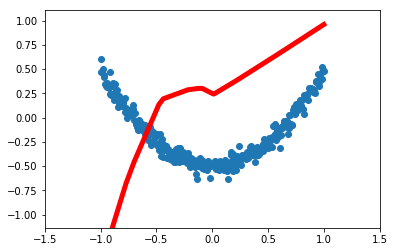

In [12]:
# plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(i, predicts, x_data, y_data):
    predict = predicts[i]
    ax.clear()
    ax.scatter(x_data, y_data)
    ax.plot(x_data, predict, 'r-', lw=5)
    ax.set_xlim(min(x_data)-0.5, max(x_data)+0.5)
    ax.set_ylim(min(y_data)-0.5, max(y_data)+0.5)

ani = animation.FuncAnimation(fig, animate, frames=len(predicts), fargs=(predicts, x_data, y_data,))
ani

### tf.reduce_sum

In [13]:
'''tf.reduce_sum:
'x' is [[1, 2, 3]

        [4, 5, 6]]

* sum
tf.reduce_sum(x) ==> 21

* sum by rows
tf.reduce_sum(x, 0) ==> [5, 7, 9]

* sun by columns
tf.reduce_sum(x, 1) ==> [6, 15]

* 按照行的维度求和
tf.reduce_sum(x, 1, keep_dims=True) ==> [[6], [15]]

* 行列求和
tf.reduce_sum(x, [0, 1]) ==> 21
'''

x = np.array([[1,2,3], [4,5,6]])
a1 = tf.reduce_sum(x)
a2 = tf.reduce_sum(x, reduction_indices=[0])
a3 = tf.reduce_sum(x, reduction_indices=[1])
a4 = tf.reduce_sum(x, reduction_indices=[1], keep_dims=True)
a5 = tf.reduce_sum(x, reduction_indices=[1, 0])

with tf.Session() as sess:
    res = sess.run([a1, a2, a3, a4, a5])

for i in range(5):
    print('a'+str(i+1)+':', res[i])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
a1: 21
a2: [5 7 9]
a3: [ 6 15]
a4: [[ 6]
 [15]]
a5: 21


### Activation function

In [14]:
# https://github.com/beckhong/Tensorflow-Tutorial/blob/master/tutorial-contents/204_activation.py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.nn import relu, sigmoid, tanh, softplus

def activation_plot(x, y, label, ylim):
    plt.figure(1, figsize=(4, 3))
    plt.plot(x, y, c='red', label=label)
    plt.ylim(ylim)
    plt.legend(loc='best')
    plt.show()

In [15]:
x = np.linspace(-5, 5, 200)     # x data, shape=(100, 1)

# following are popular activation functions
y_relu = relu(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_softplus =softplus(x)

sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

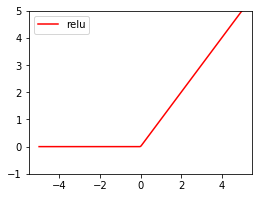

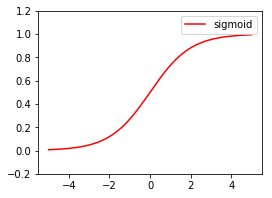

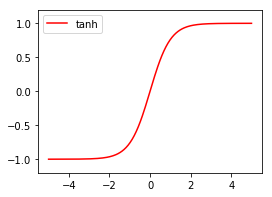

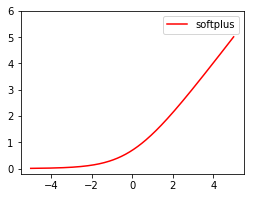

In [16]:
# plt to visualize these activation function
activation_plot(x, y_relu, 'relu', (-1, 5))
activation_plot(x, y_sigmoid, 'sigmoid', (-0.2, 1.2))
activation_plot(x, y_tanh, 'tanh', (-1.2, 1.2))
activation_plot(x, y_softplus, 'softplus', (-0.2, 6))

### Optimizers

In [30]:
# https://github.com/beckhong/Tensorflow-Tutorial/blob/master/tutorial-contents/304_optimizer.py
# shape (100, 1)
x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size=x.shape)
# add some noise
y = np.power(x, 2) + noise

# default network
BATCH_SIZE = 32
class Net(object):
    def __init__(self, opt, lr=0.01, **kwargs):
        self.x = tf.placeholder(tf.float32, [None, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l, 1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(lr, **kwargs).minimize(self.loss)

In [31]:
# different nets
net_SGD         = Net(tf.train.GradientDescentOptimizer)
net_Momentum    = Net(tf.train.MomentumOptimizer, momentum=0.9)
net_RMSprop     = Net(tf.train.RMSPropOptimizer)
net_Adam        = Net(tf.train.AdamOptimizer)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [32]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [33]:
# record loss
losses_his = [[], [], [], []]

# training
for step in range(300):
    # random choose
    index = np.random.randint(0, x.shape[0], BATCH_SIZE)
    b_x = x[index]
    b_y = y[index]

    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)

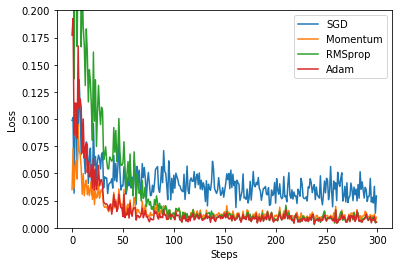

In [34]:
# plot loss history
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

### Classification

In [17]:
# https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/5-01-classifier/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

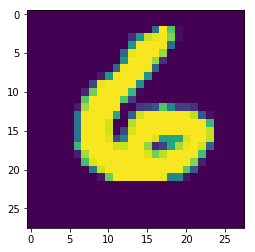

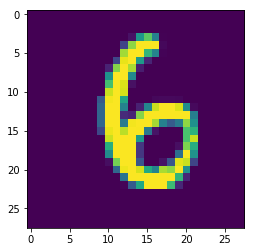

In [18]:
# https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib?rq=1
# images
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

# Get a batch of two random images and show in a pop-up window.
batch_xs, batch_ys = mnist.test.next_batch(2)
gen_image(batch_xs[0]).show()
gen_image(batch_xs[1]).show()

In [19]:
# define layer
def add_layer(inputs, in_size, out_size, activation_fun = None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]))
    # tf.matmul: 两个矩阵相乘
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_fun is None:
        output = Wx_plus_b
    else:
        output = activation_fun(Wx_plus_b)
    return output

# accuracy
def compute_accuracy(prediction, v_xs, v_ys):
    # prediction using validation sets
    y_pred = sess.run(prediction, feed_dict={xs: v_xs})
    # 取預測結果最大值，計算其位置(label)並與真實y的label做比較
    correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(v_ys, 1))
    # compute accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# building simple network(輸入+輸出層)
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# 輸入784個feature；輸出10個feature，使用softmax
prediction = add_layer(xs, 784, 10, activation_fun=tf.nn.softmax)

In [20]:
# cross entropy: L=-sum(y_j*log(softmax_j), j=1,2,...,10)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                               reduction_indices=[1])) # loss
# using Gradient Descent
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# 不要使用tf.initialize_all_variables()
sess.run(tf.global_variables_initializer())

In [21]:
# training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(prediction, mnist.test.images, mnist.test.labels))

0.1143
0.6354
0.7445
0.7785
0.8056
0.8232
0.8359
0.8416
0.8499
0.8532
0.8541
0.8617
0.8597
0.8653
0.8673
0.8679
0.8747
0.8742
0.8778
0.8771


### Dropout - to prevent overfitting

In [ ]:
# https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/5-02-dropout/
# building network with one hidden layer(輸入+隱藏層+輸出層)
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

l1 = add_layer(xs, 64, 50, 'l1', activation_function=tf.nn.tanh)
prediction = add_layer(l1, 50, 10, 'l2', activation_function=tf.nn.softmax)

In [ ]:
## https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/5-02-dropout/